In [9]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from torchvision import datasets ,models,transforms
import os
import matplotlib.image as img

from torch.utils.data import Dataset, DataLoader
#from torch.nn import Linear, ReLU, CrossEntropyLoss, Conv2d, MaxPool2d, Module
from torch.optim import Adam
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn.modules.module import Module

import pickle

In [179]:
import math

# Q1

In [271]:
a=np.array([1,2,3]).reshape(1,-1)  
b=np.array([4,5,6]).reshape(-1, 1)  
c=2
d=np.array([1,1,2]).reshape(-1, 1)  
y_target=np.array([1, 1, 1]).reshape(-1, 1)

In [267]:
y = 1 / np.exp((np.dot(a,b) + c) * d)

In [268]:
a1 = np.dot(a,b)
a2 = a1 + c
a3 = a2 * d
a4 = np.exp(a3)
a5 = 1/a4
a1,a2,a3,a4,a5

(array([[32]]),
 array([[34]]),
 array([[34],
        [34],
        [68]]),
 array([[5.83461743e+14],
        [5.83461743e+14],
        [3.40427605e+29]]),
 array([[1.71390843e-15],
        [1.71390843e-15],
        [2.93748211e-30]]))

In [269]:
grad_a1.shape,a.shape,b

((3, 1),
 (1, 3),
 array([[4],
        [5],
        [6]]))

In [275]:
a2

array([[34]])

In [276]:
grad_y_pred =  y_target
grad_a4 = grad_y_pred * (-1/pow(a4, 2))
grad_a3 = grad_a4 * np.exp(a3)
grad_a2 = grad_a3 * d
grad_d = grad_a3 * a2
grad_a1 = grad_a2 * 1
grad_c = grad_a2 * 1
grad_b = grad_a1 * a.T
grad_a = grad_a1 * b
grad_a, grad_b,grad_c,grad_d,grad_a1,grad_a2,grad_a3,grad_a4,grad_y_pred

(array([[-6.85563373e-15],
        [-8.56954216e-15],
        [-3.52497853e-29]]),
 array([[-1.71390843e-15],
        [-3.42781686e-15],
        [-1.76248927e-29]]),
 array([[-1.71390843e-15],
        [-1.71390843e-15],
        [-5.87496422e-30]]),
 array([[-5.82728867e-14],
        [-5.82728867e-14],
        [-9.98743918e-29]]),
 array([[-1.71390843e-15],
        [-1.71390843e-15],
        [-5.87496422e-30]]),
 array([[-1.71390843e-15],
        [-1.71390843e-15],
        [-5.87496422e-30]]),
 array([[-1.71390843e-15],
        [-1.71390843e-15],
        [-2.93748211e-30]]),
 array([[-2.93748211e-30],
        [-2.93748211e-30],
        [-8.62880116e-60]]),
 array([[1],
        [1],
        [1]]))

In [137]:
def forword(a, b, c, d):
    
    a1 = np.dot(a,b)
    a2 = a1 + c
    a3 = a2 * d
    a4 = np.exp(a3)
    a5 = 1/a4
    
    return a5

In [138]:
def backward(self, y, t, a, b, c, d):
    grad = {}
    grad_y_pred = y - y_target
    grad_a4 = grad_y_pred * (-1/a4^2)
    grad_a3 = grad_a4 * np.exp(a3)
    grad_a2 = grad_a3 * d
    grad_d = grad_a3 * a2
    grad_a1 = grad_a2 * 1
    grad_c = grad_a2 * 1
    grad_b = grad_a1 * a
    grad_a = grad_a1 * b
    
    grad['grad_a'] = grad_a
    grad['grad_b'] = grad_b
    grad['grad_c'] = grad_c
    grad['grad_d'] = grad_d
    return grad

In [277]:
class perceptron():
    def __init__(self, a,b,c,d):
        self.parameters = {}
        self.parameters['a'] = a
        self.parameters['b'] = b
        self.parameters['c'] = c
        self.parameters['d'] = d
    def forward(self, a, b, c, d):
        a1 = np.dot(a,b)
        a2 = a1 + c
        a3 = a2 * d
        a4 = np.exp(a3)
        a5 = 1/a4
        return y, a3, a4
    
    def backward(self, y, y_target, a, b, c, d, a3, a4 ):
        grad = {}
        grad_y_pred = y - y_target
        grad_a4 = grad_y_pred * (-1/pow(a4, 2))
        grad_a3 = grad_a4 * np.exp(a3)
        grad_a2 = grad_a3 * d
        grad_d = grad_a3 * a2
        grad_a1 = grad_a2 * 1
        grad_c = grad_a2 * 1
        grad_b = grad_a1 * a
        grad_a = grad_a1 * b

        grad['grad_a'] = grad_a
        grad['grad_b'] = grad_b
        grad['grad_c'] = grad_c
        grad['grad_d'] = grad_d
        return grad
    
    def train(self, a, b, c, d, y_target, learning_rate=0.05):
        y,a3, a4 = self.forward(a, b, c, d)
        loss = -np.mean(abs(y_target - y))
        grad = self.backward(y, y_target, a, b, c, d, a3, a4)
        self.parameters['a'] = self.parameters['a'] - learning_rate * grad['grad_a']
        self.parameters['b'] = self.parameters['b'] - learning_rate * grad['grad_b']
        self.parameters['c'] = self.parameters['c'] - learning_rate * grad['grad_c']
        self.parameters['d'] = self.parameters['d'] - learning_rate * grad['grad_d']
        return loss

In [278]:
run = perceptron(a,b,c,d)

In [310]:
loss = run.train(a=a, b=b, c=c, d=d, y_target=y_target, learning_rate=0.05)
loss

-0.9999999999999988

# Q2

# load data

In [10]:
# CPU or GPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device
device='cpu'

In [11]:
#讀取train、validation、test
f = open("../train.txt")
train_txt = f.readlines()
f.close()
f = open("../val.txt")
val_txt = f.readlines()
f.close()
f = open("../test.txt")
test_txt = f.readlines()
f.close()

In [12]:
def readpic(p):
    #return mpimg.imread(p)
    return cv2.imread(p)

def showpic(pic):
    plt.imshow(pic)
    plt.show()

def more_showpic(pic_list):
    fig,ax = plt.subplots(1,5,figsize = (15,3))
    for idx, vactor in enumerate(pic_list[:5]):
        #ax[idx].imshow(vactor)
        ax[idx].imshow(cv2.cvtColor(vactor, cv2.COLOR_BGR2RGB))

In [13]:
#train image
train_img_path = []
train_img_label = []
for img_path in train_txt:
    train_path , train_label = img_path.split( )
    train_img_path.append(train_path)
    train_img_label.append(train_label)
#validation image   
val_img_path = []
val_img_label = []
for img_path in val_txt:
    val_path , val_label = img_path.split( )
    val_img_path.append(val_path)
    val_img_label.append(val_label)
#test image     
test_img_path = []
test_img_label = []
for img_path in test_txt:
    test_path , test_label = img_path.split( )
    test_img_path.append(test_path)
    test_img_label.append(test_label)

In [14]:
train = []
val = []
test = []
i = 0
for train_path in train_img_path:
    train.append(readpic('../'+train_path))
        
for val_path, test_path in zip(val_img_path, test_img_path):
    val.append(readpic('../'+val_path))
    test.append(readpic('../'+test_path))

# make feature

In [15]:
#取所有圖的rbg gray數量
color = ('b','g','r')
red_train = []
blue_train = []
green_train = []
gray_train = []
for pic in train:
    histr_blue = cv2.calcHist([pic],[0],None,[256],[0,256])
    histr_green = cv2.calcHist([pic],[1],None,[256],[0,256])
    histr_red = cv2.calcHist([pic],[2],None,[256],[0,256])
    gray = cv2.cvtColor(pic, cv2.COLOR_BGR2GRAY)
    gray,_ = np.histogram(gray.ravel(), 256, [0,256])
    blue_train.append(histr_blue)
    green_train.append(histr_green)
    red_train.append(histr_red)
    gray_train.append(gray)

In [16]:
blue_train = np.array(blue_train)
green_train = np.array(green_train)
red_train = np.array(red_train)
gray_train = np.array(gray_train)
train_data = np.concatenate((red_train.squeeze(2), green_train.squeeze(2), blue_train.squeeze(2), gray_train), axis=1)

In [17]:
#取所有圖的rbg gray數量
color = ('b','g','r')
red_valid = []
blue_valid = []
green_valid = []
gray_valid = []
for pic in val:
    histr_blue = cv2.calcHist([pic],[0],None,[256],[0,256])
    histr_green = cv2.calcHist([pic],[1],None,[256],[0,256])
    histr_red = cv2.calcHist([pic],[2],None,[256],[0,256])
    gray = cv2.cvtColor(pic, cv2.COLOR_BGR2GRAY)
    gray,_ = np.histogram(gray.ravel(), 256, [0,256])
    blue_valid.append(histr_blue)
    green_valid.append(histr_green)
    red_valid.append(histr_red)
    gray_valid.append(gray)

In [18]:
blue_valid = np.array(blue_valid)
green_valid = np.array(green_valid)
red_valid = np.array(red_valid)
gray_valid = np.array(gray_valid)
valid_data = np.concatenate((red_valid.squeeze(2), green_valid.squeeze(2), blue_valid.squeeze(2), gray_valid), axis=1)

In [19]:
#取所有圖的rbg gray數量
color = ('b','g','r')
red_test = []
blue_test = []
green_test = []
gray_test = []
for pic in test:
    histr_blue = cv2.calcHist([pic],[0],None,[256],[0,256])
    histr_green = cv2.calcHist([pic],[1],None,[256],[0,256])
    histr_red = cv2.calcHist([pic],[2],None,[256],[0,256])
    gray = cv2.cvtColor(pic, cv2.COLOR_BGR2GRAY)
    gray,_ = np.histogram(gray.ravel(), 256, [0,256])
    blue_test.append(histr_blue)
    green_test.append(histr_green)
    red_test.append(histr_red)
    gray_test.append(gray)

In [20]:
blue_test = np.array(blue_test)
green_test = np.array(green_test)
red_test = np.array(red_test)
gray_test = np.array(gray_test)
test_data = np.concatenate((red_test.squeeze(2), green_test.squeeze(2), blue_test.squeeze(2), gray_test), axis=1)

In [25]:
train_label_ML =np.array(train_img_label)
valid_label_ML =np.array(val_img_label)
test_label_ML =np.array(test_img_label)
train_label_ML = train_label_ML.astype('int64')
valid_label_ML = valid_label_ML.astype('int64')
test_label_ML = test_label_ML.astype('int64')

In [26]:
train = {'train_data':train_data, 'train_label':train_label_ML}
valid = {'valid_data':valid_data, 'valid_label':valid_label_ML}
test = {'test_data':test_data, 'test_label':test_label_ML}

# Save Feature

In [28]:
with open('../data_pickle/train_data_RGBG.pickle', 'wb') as f:
    pickle.dump(train, f)
with open('../data_pickle/valid_data_RGBG.pickle', 'wb') as f:
    pickle.dump(valid, f)
with open('../data_pickle/test_data_RGBG.pickle', 'wb') as f:
    pickle.dump(test, f)

# Load Feature

In [304]:
with open('../data_pickle/train_data_RGBG.pickle', 'rb') as f :
    train = pickle.load(f)
with open('../data_pickle/valid_data_RGBG.pickle', 'rb') as f :
    valid = pickle.load(f)
with open('../data_pickle/test_data_RGBG.pickle', 'rb') as f :
    test = pickle.load(f)

In [315]:
train_data = train['train_data']
train_label_ML = train['train_label']
valid_data = valid['valid_data']
valid_label_ML = valid['valid_label']
test_data = test['test_data']
test_label_ML = test['test_label']

In [247]:
Z = W1.dot(x) + b1
A = softmax(Z)

n = x.shape[0]
dZ = A - y_target
dW = dZ.dot(x.T) / n
db = np.sum(dZ, axis=1, keepdims=True) / n

# Two Layer NN Model

In [281]:
import numpy as np
from layers import *
from gradient import numerical_gradient
from collections import OrderedDict

In [312]:
class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):
       
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size) 
        self.params['b2'] = np.zeros(output_size)

        # 
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])
        self.lastLayer = SoftmaxWithLoss()
    
    
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        
        return x
        
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)
    
    def accuracy(self, x, t, k ):
        y = self.predict(x)
        y_hat_k = y.argsort(axis=0).T[:,-k:]
        #y = np.argmax(y, axis=1)
        #if t.ndim != 1 : t = np.argmax(t, axis=1)
        accuracy = np.sum(y == t) / float(x.shape[0])
        #y = np.argmax(y, axis=1)
        #t = np.argmax(t, axis=1)
        accuracy = (y_hat_k.any() == t).sum() / float(x.shape[0])        
        return accuracy


    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 設定
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads

In [322]:
# 超參數 
iters_num = 1000
batch_size = 100
learning_rate = 0.01
train_size = train_label_ML.shape[0]

network = TwoLayerNet(input_size=1024, hidden_size=128, output_size=50)

In [332]:
train_acc_list = []
valid_acc_list = []
test_acc_list = []
train_acc_5_list = []
valid_acc_5_list = []
test_acc_5_list = []

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = train_data[batch_mask]
    t_batch = train_label_ML[batch_mask]
    
    # 勾配
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % 100 == 0:
#         train_acc = network.accuracy(x_train, t_train)
#         test_acc = network.accuracy(x_test, t_test)
#         train_acc_list.append(train_acc)
#         test_acc_list.append(test_acc)
#         print(train_acc, test_acc)
        train_acc = network.accuracy(train_data, train_label_ML, k= 1)        
        valid_acc = network.accuracy(valid_data, valid_label_ML, k= 1)  
        test_acc = network.accuracy(test_data, test_label_ML, k= 1)
        
        train_acc_5 = network.accuracy(train_data, train_label_ML, k= 5)        
        valid_acc_5 = network.accuracy(valid_data, valid_label_ML, k= 5)  
        test_acc_5 = network.accuracy(test_data, test_label_ML, k= 5)
        
        train_acc_list.append(train_acc) 
        valid_acc_list.append(valid_acc)
        test_acc_list.append(test_acc)     
        
        train_acc_5_list.append(train_acc_5) 
        valid_acc_5_list.append(valid_acc_5)
        test_acc_5_list.append(test_acc_5)
        #print("train acc, valid acc , test acc| " + str(train_acc) + ", " + str(valid_acc) + ", " + str(test_acc)+'；' +"train acc_5, valid acc_5, test acc_5| " + str(train_acc_5) + ", " + str(valid_acc_5) + ", " + str(test_acc_5))
        print("epochs：{}, train acc：{:.6}, valid acc：{} , test acc：{} ".format(i, train_acc,valid_acc,test_acc)+'；' +"train acc_5：{:.6}, valid acc_5：{}, test acc_5：{} ".format(train_acc_5, valid_acc_5, test_acc_5))


/home/re6091054/.local/lib/python3.6/site-packages/ipykernel_launcher.py:33: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


epochs：0, train acc：0.0202448, valid acc：0.02 , test acc：0.02 ；train acc_5：0.0202448, valid acc_5：0.02, test acc_5：0.02 
epochs：100, train acc：0.0202448, valid acc：0.02 , test acc：0.02 ；train acc_5：0.0202448, valid acc_5：0.02, test acc_5：0.02 
epochs：200, train acc：0.0202448, valid acc：0.02 , test acc：0.02 ；train acc_5：0.0202448, valid acc_5：0.02, test acc_5：0.02 
epochs：300, train acc：0.0202448, valid acc：0.02 , test acc：0.02 ；train acc_5：0.0202448, valid acc_5：0.02, test acc_5：0.02 
epochs：400, train acc：0.0202448, valid acc：0.02 , test acc：0.02 ；train acc_5：0.0202448, valid acc_5：0.02, test acc_5：0.02 
epochs：500, train acc：0.0202448, valid acc：0.02 , test acc：0.02 ；train acc_5：0.0202448, valid acc_5：0.02, test acc_5：0.02 
epochs：600, train acc：0.0202448, valid acc：0.02 , test acc：0.02 ；train acc_5：0.0202448, valid acc_5：0.02, test acc_5：0.02 
epochs：700, train acc：0.0202448, valid acc：0.02 , test acc：0.02 ；train acc_5：0.0202448, valid acc_5：0.02, test acc_5：0.02 
epochs：800, train 

In [341]:
x = np.arange(0, 1000, 100)

In [342]:
import matplotlib.pylab as plt
import seaborn as sns

In [343]:
x.shape,len(train_acc_list)

((10,), 10)

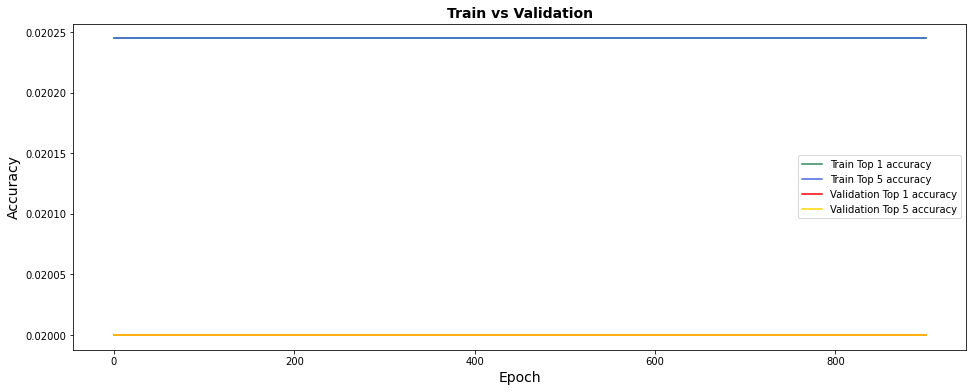

In [344]:
fig = plt.figure()
#x = list(range(0, len(train_acc) * 50, 50))
ax = sns.lineplot(x = x, y = train_acc_list, color='seagreen', label = 'Train Top 1 accuracy')
sns.lineplot(x = x, y = train_acc_5_list, color='royalblue', label = 'Train Top 5 accuracy')
sns.lineplot(x = x, y = valid_acc_list, color='red', label = 'Validation Top 1 accuracy')
sns.lineplot(x = x, y = valid_acc_5_list, color='gold', label = 'Validation Top 5 accuracy')
ax.set_xlabel("Epoch", size = 14)
ax.set_ylabel("Accuracy", size = 14)
ax.set_title("Train vs Validation", size = 14, fontweight='bold')
ax.legend()
fig.set_figheight(6)
fig.set_figwidth(16)

# One Layer NN Model 

In [318]:
class OneLayerNet():
    def __init__(self, input_size, output_size, weight_init_std=0.01):
        """
        :param: input_size - 輸入層的神經元數
        :param: hidden_size - 隱藏層的神經元數
        ;param: output_size - 輸出層的神經元數
        """
        # 初始化權重        
        self.params = {}        
        self.params["W"] = weight_init_std * np.random.randn(input_size, output_size)       
        self.params["b"] = np.zeros(output_size)        
    
    def softmax(self, z):    

        exp_z = np.exp(z - np.max(z)) # 溢位對策    
        sum_exp_z = np.sum(exp_z)    
        y = exp_z / sum_exp_z
        return y

    
    def forward(self, x):
        Z = np.dot(x, self.params["W"]) +self.params["b"]
        A = self.softmax(Z)
        return A
    
    def backward(self, x, y_target, A):
        grads = {}        

        n = x.shape[0]
        dZ = A - y_target
        dW = np.dot(x.T, dZ) / n
        db = np.sum(dZ, axis=1, keepdims=True) / n
        grads["dW"] = dW       
        grads["db"] = db
        return grads
        
    def cross_entropy_error(self, y, t):    
        if y.ndim == 1:        
            t = t.reshape(1, t.size)        
            y = y.reshape(1, y.size)
        batch_size = y.shape[0]    
        return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

    def loss(self, x, t):        
        y = self.predict(x)  
        return self.cross_entropy_error(y, t)
        
    def train(self, x, t): 
        A = self.forward(x)
        loss = self.cross_entropy_error(A.astype('int64'), t.astype('int64'))
        grads = self.backward(x, t, A)
        #print('x=',x.shape, 'W=',self.params["W"].shape, 'b=',self.params["b"].shape)
        self.params["W"] = self.params["W"] - learning_rate * grads["dW"]
        self.params["b"] = self.params["b"] - learning_rate * grads["db"]
        #print('x=',x.shape, 'W=',self.params["W"].shape, 'b=',self.params["b"].shape)
        return loss
     
    def predict(self, x, t, k):        
        y = self.forward(x)
        y_hat_k = y.argsort(axis=0).T[:,-k:]
        #y = np.argmax(y, axis=1)
        #t = np.argmax(t, axis=1)
        accuracy = (y_hat_k.any() == t).sum() / float(x.shape[0])        
        return accuracy


In [319]:
# 超引數 
iters_num = 1000
batch_size = 1
learning_rate = 0.001

network = OneLayerNet(input_size=1024,output_size=50)

In [320]:
# NN訓練程式碼

train_loss_list = [] 
train_acc_list = [] 
valid_acc_list = [] 
test_acc_list = []
# 平均每個epoch的重複次數 
train_size = train_label_ML.shape[0]
#train_label_ML = _change_one_hot_label(train_label_ML)
for i in range(iters_num):    
    # 獲取mini-batch    
    batch_mask = np.random.choice(train_size, batch_size)    
    x_batch = train_data[batch_mask] 
    t_batch = train_label_ML[batch_mask]

    loss = network.train(x_batch, t_batch)
    train_loss_list.append(loss)

    # 計算每個epoch的識別精度    
    if i % 100 == 0:        
        train_acc = network.predict(train_data, train_label_ML, k= 1)        
        valid_acc = network.predict(valid_data, valid_label_ML, k= 1)  
        test_acc = network.predict(test_data, test_label_ML, k= 1)
        
        train_acc_5 = network.predict(train_data, train_label_ML, k= 5)        
        valid_acc_5 = network.predict(valid_data, valid_label_ML, k= 5)  
        test_acc_5 = network.predict(test_data, test_label_ML, k= 5)
        
        train_acc_list.append(train_acc) 
        valid_acc_list.append(valid_acc)
        test_acc_list.append(test_acc)        
        #print("train acc, valid acc , test acc| " + str(train_acc) + ", " + str(valid_acc) + ", " + str(test_acc)+'；' +"train acc_5, valid acc_5, test acc_5| " + str(train_acc_5) + ", " + str(valid_acc_5) + ", " + str(test_acc_5))
        print("epochs：{}, train acc：{:.6}, valid acc：{} , test acc：{} ".format(i, train_acc,valid_acc,test_acc)+'；' +"train acc_5：{:.6}, valid acc_5：{}, test acc_5：{} ".format(train_acc_5, valid_acc_5, test_acc_5))


epochs：0, train acc：0.0202448, valid acc：0.02 , test acc：0.02 ；train acc_5：0.0202448, valid acc_5：0.02, test acc_5：0.02 
epochs：100, train acc：0.0202448, valid acc：0.02 , test acc：0.02 ；train acc_5：0.0202448, valid acc_5：0.02, test acc_5：0.02 
epochs：200, train acc：0.0202448, valid acc：0.02 , test acc：0.02 ；train acc_5：0.0202448, valid acc_5：0.02, test acc_5：0.02 
epochs：300, train acc：0.0202448, valid acc：0.02 , test acc：0.02 ；train acc_5：0.0202448, valid acc_5：0.02, test acc_5：0.02 
epochs：400, train acc：0.0202448, valid acc：0.02 , test acc：0.02 ；train acc_5：0.0202448, valid acc_5：0.02, test acc_5：0.02 
epochs：500, train acc：0.0202448, valid acc：0.02 , test acc：0.02 ；train acc_5：0.0202448, valid acc_5：0.02, test acc_5：0.02 
epochs：600, train acc：0.0202448, valid acc：0.02 , test acc：0.02 ；train acc_5：0.0202448, valid acc_5：0.02, test acc_5：0.02 
epochs：700, train acc：0.0202448, valid acc：0.02 , test acc：0.02 ；train acc_5：0.0202448, valid acc_5：0.02, test acc_5：0.02 
epochs：800, train 

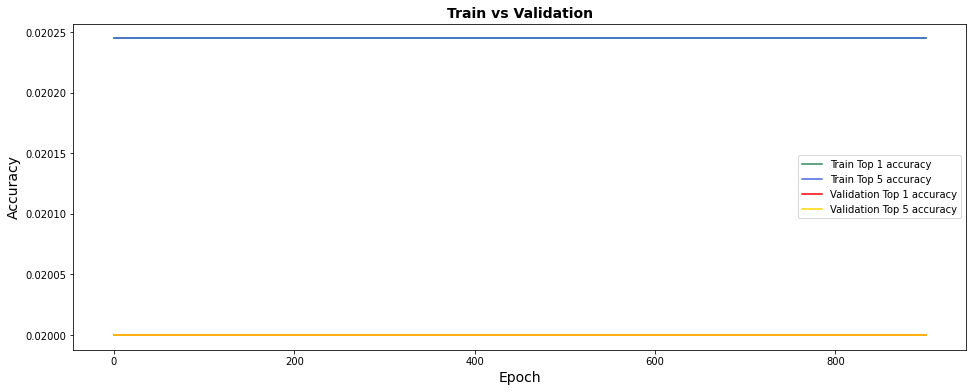

In [345]:
fig = plt.figure()
#x = list(range(0, len(train_acc) * 50, 50))
ax = sns.lineplot(x = x, y = train_acc_list, color='seagreen', label = 'Train Top 1 accuracy')
sns.lineplot(x = x, y = train_acc_5_list, color='royalblue', label = 'Train Top 5 accuracy')
sns.lineplot(x = x, y = valid_acc_list, color='red', label = 'Validation Top 1 accuracy')
sns.lineplot(x = x, y = valid_acc_5_list, color='gold', label = 'Validation Top 5 accuracy')
ax.set_xlabel("Epoch", size = 14)
ax.set_ylabel("Accuracy", size = 14)
ax.set_title("Train vs Validation", size = 14, fontweight='bold')
ax.legend()
fig.set_figheight(6)
fig.set_figwidth(16)